# So this is my starting work at speech recognition
Hanashi means talk or speech in Japanese.

ps: really a noob, don't hesitate to correct me :p

1. First make the audio into a sound wave and make that a pictorial representation (something known as spectrogram).




In [1]:
!pip install pydub
!pip install matplotlib
!apt-get install ffmpeg
!pip install librosa

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


(1, 2, 44100, 355968, 'NONE', 'not compressed', 8.071836734693878)


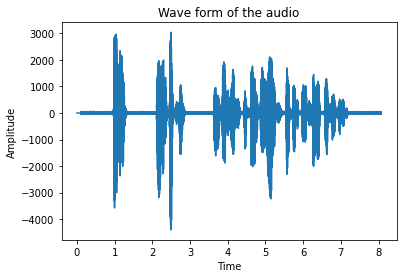

In [12]:
import numpy as np
import matplotlib.pyplot as plt

import wave
from os import path
from pydub import AudioSegment


class audio_processing(object):
    def __init__(self, sample_src, sample_dst, resample):
        self.sample_src = sample_src
        self.sample_dst = sample_dst
        self.resample = resample
        self.__wav_conversion()
        self.__wav_resample()

    def __wav_conversion(self):
        sound = AudioSegment.from_mp3(self.sample_src)
        sound.export(self.sample_dst, format="wav")

    def wav_info(self):
        audio_wave = wave.open(str(self.sample_dst), "rb")

        nchannels = audio_wave.getnchannels()
        sampwidth = audio_wave.getsampwidth()
        framerate = audio_wave.getframerate()
        nframes = audio_wave.getnframes()
        comptype = audio_wave.getcomptype()
        compname = audio_wave.getcompname()
        total_time = nframes/framerate

        audio_wave.close()
        return nchannels, sampwidth, framerate, nframes, comptype, compname, total_time

    def __wav_resample(self):
        nchannels, sampwidth, framerate, nframes, comptype, compname, total_time = self.wav_info()
        audio_wave = wave.open("/home/resample.wav", "wb")
        params = (nchannels, sampwidth, self.resample, nframes, comptype, compname)
        audio_wave.setparams(params)

        audio_wave.close()

    def wav_waveform(self):
        nchannels, sampwidth, framerate, nframes, comptype, compname, total_time = self.wav_info()

        audio_wave = wave.open(str(self.sample_dst), "rb")
        
        read_frames = audio_wave.readframes(-1)
        read_frames = np.frombuffer(read_frames, dtype="int16")

        time_axis = np.linspace(0, total_time, len(read_frames))

        audio_wave.close()
        plt.figure(1)
        plt.title("Wave form of the audio")

        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.plot(time_axis, read_frames)
        plt.show()

if __name__ == "__main__":
    sample_src = "/home/sample.mp3"
    sample_dst = "/home/sample.wav"
    audio_processing = audio_processing(sample_src, sample_dst, 8000) #resampling to 8000hz
    audio_processing.wav_waveform()



1.19.5
3041
-4405
2
44100


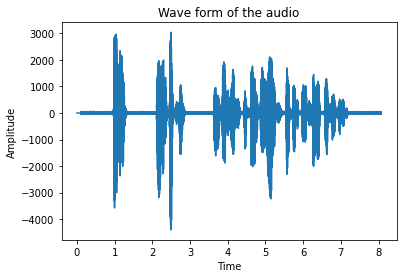

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import wave
from os import path
from pydub import AudioSegment


print(np.__version__)

src = "/home/sample.mp3"
dst = "/home/sample.wav"

sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

audio_wave = wave.open("/home/sample.wav", "rb")


total_frames = audio_wave.getnframes() 
frame_rate = audio_wave.getframerate()
sample_width = audio_wave.getsampwidth()

read_frames = audio_wave.readframes(-1)
read_frames = np.frombuffer(read_frames, dtype="int16")

time = total_frames/frame_rate

print(max(read_frames))
print(min(read_frames))
print(sample_width)
print(frame_rate)

time_axis = np.linspace(0, time, len(read_frames))

plt.figure(1)
plt.title("Wave form of the audio")

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(time_axis, read_frames)
plt.show()
